# Seattle Airbnb House Listings

## In this notebook, I'll attempt to look at the house listings in the Seattle Airbnb data

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Done")

Done


In [2]:
pwd

'/Users/sukanto/Google Drive/allprojects/Seattle_Airbnb/Seattle-Airbnb'

In [3]:
tic = time.time()
df = pd.read_csv('clean_listings.csv',index_col=0)
toc = time.time() - tic
print("Time taken to load this up: %s seconds."%(toc))
df.head()

Time taken to load this up: 0.21872377395629883 seconds.


,id,last_scraped,name,summary,space,description,neighborhood_overview,transit,host_id,host_name,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,956883,Maija,...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",5177328,Andrea,...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,9851441,Emily,...,NaN,NaN,NaN,f,f,flexible,f,f,1,1.54
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


In [4]:
df.shape

(3818, 81)

In [5]:
df.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'transit', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_

## Subsetting and visualising the data

### I'll begin to subset the data now and visualise it to get some granularity.

In [6]:
df1 = df[['neighbourhood_group_cleansed','property_type', 
          'room_type', 'accommodates','price', 'weekly_price', 'monthly_price',
         'minimum_nights','maximum_nights','has_availability',
       'availability_30', 'availability_60', 'availability_90', 'availability_365',
         'bathrooms', 'bedrooms', 'beds', 'bed_type', 'accommodates','host_response_rate',
         'review_scores_rating','review_scores_checkin','review_scores_location',
          'review_scores_communication','reviews_per_month']] #getting relevant columns
df1.head()

,neighbourhood_group_cleansed,property_type,room_type,accommodates,price,weekly_price,monthly_price,minimum_nights,maximum_nights,has_availability,...,bedrooms,beds,bed_type,accommodates,host_response_rate,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
0,Queen Anne,Apartment,Entire home/apt,4,$85.00,NaN,NaN,1,365,t,...,1.0,1.0,Real Bed,4,96%,95.0,10.0,9.0,10.0,4.07
1,Queen Anne,Apartment,Entire home/apt,4,$150.00,"$1,000.00","$3,000.00",2,90,t,...,1.0,1.0,Real Bed,4,98%,96.0,10.0,10.0,10.0,1.48
2,Queen Anne,House,Entire home/apt,11,$975.00,NaN,NaN,4,30,t,...,5.0,7.0,Real Bed,11,67%,97.0,10.0,10.0,10.0,1.15
3,Queen Anne,Apartment,Entire home/apt,3,$100.00,$650.00,"$2,300.00",1,1125,t,...,0.0,2.0,Real Bed,3,NaN,NaN,NaN,NaN,NaN,1.54
4,Queen Anne,House,Entire home/apt,6,$450.00,NaN,NaN,1,1125,t,...,3.0,3.0,Real Bed,6,100%,92.0,10.0,9.0,10.0,0.89


In [7]:
df1.shape

(3818, 25)

In [8]:
tic = time.time()
df1['price'] = df1['price'].str.replace("[$,]", "").astype("float")
df1['weekly_price'] = df1['weekly_price'].str.replace("[$,]", "").astype("float")
df1['monthly_price'] = df1['monthly_price'].str.replace("[$,]", "").astype("float")
toc = time.time() - tic
print("Time taken for this is %s seconds."%(toc)) #fixing strings in price columns
df1.head()

Time taken for this is 0.02748894691467285 seconds.


/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,neighbourhood_group_cleansed,property_type,room_type,accommodates,price,weekly_price,monthly_price,minimum_nights,maximum_nights,has_availability,...,bedrooms,beds,bed_type,accommodates,host_response_rate,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication,reviews_per_month
0,Queen Anne,Apartment,Entire home/apt,4,85.0,NaN,NaN,1,365,t,...,1.0,1.0,Real Bed,4,96%,95.0,10.0,9.0,10.0,4.07
1,Queen Anne,Apartment,Entire home/apt,4,150.0,1000.0,3000.0,2,90,t,...,1.0,1.0,Real Bed,4,98%,96.0,10.0,10.0,10.0,1.48
2,Queen Anne,House,Entire home/apt,11,975.0,NaN,NaN,4,30,t,...,5.0,7.0,Real Bed,11,67%,97.0,10.0,10.0,10.0,1.15
3,Queen Anne,Apartment,Entire home/apt,3,100.0,650.0,2300.0,1,1125,t,...,0.0,2.0,Real Bed,3,NaN,NaN,NaN,NaN,NaN,1.54
4,Queen Anne,House,Entire home/apt,6,450.0,NaN,NaN,1,1125,t,...,3.0,3.0,Real Bed,6,100%,92.0,10.0,9.0,10.0,0.89


In [9]:
#subsetting for House listings

tic = time.time()
df2 = df1.loc[df1['property_type'] == 'House',
              ['neighbourhood_group_cleansed','price','weekly_price','monthly_price','bedrooms',
              'availability_30','availability_60','availability_90','availability_365','minimum_nights',
               'accommodates','reviews_per_month','review_scores_rating',
              'review_scores_checkin','review_scores_location',
              'review_scores_communication']]
toc = time.time() - tic
print("Time taken: %s seconds."%(toc))
df2.head()

Time taken: 0.00888204574584961 seconds.


,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,NaN,NaN,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,NaN,NaN,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,800.0,NaN,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,575.0,NaN,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,595.0,NaN,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [10]:
df2.isnull().any() #missing value check

neighbourhood_group_cleansed    False
price                           False
weekly_price                     True
monthly_price                    True
bedrooms                         True
availability_30                 False
availability_60                 False
availability_90                 False
availability_365                False
minimum_nights                  False
accommodates                    False
accommodates                    False
reviews_per_month               False
review_scores_rating             True
review_scores_checkin            True
review_scores_location           True
review_scores_communication      True
dtype: bool

In [11]:
areas = df2['neighbourhood_group_cleansed'].value_counts() #other neighbourhoods top, again
areas

Other neighborhoods    496
Central Area           216
Capitol Hill           168
Ballard                146
West Seattle           141
Rainier Valley         114
Queen Anne              93
Beacon Hill             76
Delridge                56
Lake City               54
Northgate               45
Magnolia                39
University District     39
Seward Park             35
Cascade                  9
Interbay                 4
Downtown                 2
Name: neighbourhood_group_cleansed, dtype: int64

In [12]:
#trying again, to drop that listing with zero bedrooms but a 'real bed'(two rather)

df2.dropna(subset=['bedrooms'],axis=0) 
df2.head()

,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,NaN,NaN,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,NaN,NaN,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,800.0,NaN,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,575.0,NaN,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,595.0,NaN,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [13]:
tic = time.time()
df2['review_scores_checkin'] = df2['review_scores_checkin'].fillna((df2['review_scores_checkin'].mean()))
df2['review_scores_location'] = df2['review_scores_location'].fillna((df2['review_scores_location'].mean()))
df2['review_scores_communication'] = df2['review_scores_communication'].fillna((df2['review_scores_communication'].mean()))
toc = time.time() - tic
print("Time taken: %s seconds."%(toc))
df2.head() #impute the missing values, if you will

Time taken: 0.012035131454467773 seconds.


,neighbourhood_group_cleansed,price,weekly_price,monthly_price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,NaN,NaN,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,NaN,NaN,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,800.0,NaN,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,575.0,NaN,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,595.0,NaN,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [14]:
#dropping the monthly and weekly price columns, given too many missing values
df2.drop(['monthly_price','weekly_price'],axis=1,inplace=True)
df2.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
4,Queen Anne,450.0,3.0,30,60,90,365,1,6,6,0.89,92.0,10.0,9.0,10.0
5,Queen Anne,120.0,1.0,0,0,27,302,1,2,2,2.45,95.0,10.0,10.0,10.0
6,Queen Anne,80.0,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0


In [15]:
df2.describe() #what are the summary stats for house listings like after this cleanup?

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
count,1733.000000,1732.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1460.000000,1733.000000,1733.000000,1733.000000
mean,132.351414,1.609122,17.022504,37.439123,59.121754,251.956722,2.186959,3.643970,3.643970,1.928863,94.833562,9.813618,9.531593,9.819616
std,106.877963,1.028304,12.289759,23.459449,34.131160,125.751863,2.402778,2.407087,2.407087,1.628366,6.014864,0.525609,0.605282,0.486278
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.020000,40.000000,2.000000,6.000000,2.000000
25%,65.000000,1.000000,2.000000,14.000000,31.000000,143.000000,1.000000,2.000000,2.000000,0.780000,93.000000,9.813618,9.000000,9.819616
50%,95.000000,1.000000,21.000000,48.000000,76.000000,324.000000,2.000000,3.000000,3.000000,1.540000,96.000000,10.000000,10.000000,10.000000
75%,165.000000,2.000000,30.000000,60.000000,89.000000,361.000000,2.000000,5.000000,5.000000,2.550000,99.000000,10.000000,10.000000,10.000000
max,1000.000000,7.000000,30.000000,60.000000,90.000000,365.000000,31.000000,16.000000,16.000000,10.950000,100.000000,10.000000,10.000000,10.000000


In [16]:
house_med = df2['price'].median()
print("The median house price with these specs is USD {}.".format(int(house_med))) #median house prices seem to be lower than apartments

The median house price with these specs is USD 95.


In [17]:
df3 = df2[df2['minimum_nights'] >= 2] #looking at listings which require stay of least two nights or more
df3.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,11,1.15,97.0,10.0,10.0,10.0
6,Queen Anne,80.0,1.0,20,49,71,346,3,2,2,2.46,99.0,10.0,10.0,10.0
10,Queen Anne,95.0,1.0,0,0,0,153,3,2,2,3.33,97.0,10.0,10.0,10.0
11,Queen Anne,99.0,1.0,21,21,21,229,3,2,2,0.98,97.0,9.0,10.0,10.0
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,5,3.00,100.0,9.0,10.0,9.0


In [18]:
df3 = df3.loc[:,~df3.columns.duplicated()] #oops again, the accommodation column got duplicated at some stage
df3

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,1.15,97.0,10.000000,10.000000,10.000000
6,Queen Anne,80.0,1.0,20,49,71,346,3,2,2.46,99.0,10.000000,10.000000,10.000000
10,Queen Anne,95.0,1.0,0,0,0,153,3,2,3.33,97.0,10.000000,10.000000,10.000000
11,Queen Anne,99.0,1.0,21,21,21,229,3,2,0.98,97.0,9.000000,10.000000,10.000000
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.000000,10.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,Other neighborhoods,77.0,1.0,19,42,72,338,2,2,5.95,98.0,10.000000,10.000000,10.000000
3802,Other neighborhoods,200.0,2.0,0,0,0,247,2,4,1.54,NaN,9.813618,9.531593,9.819616
3808,Other neighborhoods,175.0,3.0,19,19,19,294,3,6,1.15,96.0,10.000000,10.000000,10.000000
3810,Other neighborhoods,154.0,2.0,13,43,73,227,2,5,1.56,92.0,10.000000,10.000000,10.000000


In [19]:
df3_a = df3[df3['accommodates'] >= 4] #time to look at apartments accommodating at least 4 people or more
df3_a.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,1.15,97.0,10.0,10.0,10.0
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.0,10.0,9.0
14,Queen Anne,461.0,6.0,19,40,65,327,3,16,2.65,98.0,10.0,10.0,10.0
15,Queen Anne,109.0,2.0,30,60,69,69,3,5,0.73,80.0,8.0,8.0,8.0
19,Queen Anne,700.0,5.0,24,54,84,359,3,10,0.82,85.0,9.0,8.0,9.0


In [20]:
df3_a.to_csv('houses_four.csv')

In [27]:
df3_a.describe() #summary stats at this point

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.00000,543.000000,543.000000,453.000000,543.000000,543.000000,543.000000
mean,213.876611,2.506446,13.668508,30.337017,48.151013,224.469613,3.12523,5.801105,1.337366,95.017660,9.792312,9.544831,9.813564
std,122.854718,1.093192,12.677109,24.858542,37.030745,127.206715,2.79281,2.069155,1.086577,6.798272,0.639569,0.634565,0.548488
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,4.000000,0.030000,40.000000,2.000000,6.000000,2.000000
25%,125.000000,2.000000,0.000000,0.000000,2.000000,105.500000,2.00000,4.000000,0.540000,93.000000,9.813618,9.000000,9.819616
50%,189.000000,2.000000,13.000000,32.000000,58.000000,263.000000,2.00000,6.000000,1.090000,97.000000,10.000000,10.000000,10.000000
75%,250.000000,3.000000,27.000000,57.000000,85.500000,345.000000,3.00000,6.000000,1.540000,100.000000,10.000000,10.000000,10.000000
max,975.000000,7.000000,30.000000,60.000000,90.000000,365.000000,30.00000,16.000000,7.150000,100.000000,10.000000,10.000000,10.000000


In [28]:
df3_a.shape

(543, 14)

In [24]:
print("The median house price for this subset is USD {}.".format(int(df3_a['price'].median())))

The median house price for this subset is USD 189.


In [26]:
h_area = df3_a['neighbourhood_group_cleansed'].value_counts()
h_area

Other neighborhoods    163
Central Area            79
West Seattle            56
Capitol Hill            46
Queen Anne              44
Ballard                 42
Rainier Valley          26
Magnolia                17
Delridge                13
Seward Park             13
Beacon Hill             11
Lake City               10
Northgate               10
University District      8
Cascade                  3
Interbay                 1
Downtown                 1
Name: neighbourhood_group_cleansed, dtype: int64

In [29]:
print("In this subset, {:.1f}% listings are in Other neighborhoods.".format(163/543*100))
print("In this subset, {:.1f}% listings are in Central Area.".format(79/543*100))
print("In this subset, {:.1f}% listings are in West Seattle.".format(56/543*100))

In this subset, 30.0% listings are in Other neighborhoods.
In this subset, 14.5% listings are in Central Area.
In this subset, 10.3% listings are in West Seattle.


In [21]:
df3_b = df3_a[df3_a['bedrooms'] >= 2] #obviously, more people will need more bedrooms
df3_b.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
2,Queen Anne,975.0,5.0,1,6,17,220,4,11,1.15,97.0,10.0,10.0,10.0
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.0,10.0,9.0
14,Queen Anne,461.0,6.0,19,40,65,327,3,16,2.65,98.0,10.0,10.0,10.0
15,Queen Anne,109.0,2.0,30,60,69,69,3,5,0.73,80.0,8.0,8.0,8.0
19,Queen Anne,700.0,5.0,24,54,84,359,3,10,0.82,85.0,9.0,8.0,9.0


In [22]:
#further subsetting for at least two or more reviews per month

df3_c = df3_b[df3_b['reviews_per_month'] >= 2]
df3_c.head()

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
13,Queen Anne,165.0,2.0,13,40,63,337,2,5,3.00,100.0,9.0,10.0,9.0
14,Queen Anne,461.0,6.0,19,40,65,327,3,16,2.65,98.0,10.0,10.0,10.0
31,Queen Anne,325.0,3.0,23,50,77,162,2,6,2.18,92.0,10.0,10.0,9.0
125,Ballard,338.0,4.0,16,46,72,154,3,8,2.05,97.0,10.0,10.0,10.0
151,Ballard,133.0,2.0,30,60,90,365,2,8,2.87,95.0,9.0,10.0,10.0


In [24]:
df3_c.shape #dataframe shape at this stage

(68, 14)

In [25]:
df3_c.describe() #and the summary stats at this stage

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,181.308824,2.602941,16.838235,39.529412,62.750000,230.455882,2.264706,5.941176,2.954853,95.779412,9.897059,9.720588,9.838235
std,90.283014,0.831106,10.642930,17.964701,25.759725,116.763498,0.821677,2.006574,0.870551,5.685398,0.391694,0.483939,0.444210
min,65.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,60.000000,8.000000,8.000000,8.000000
25%,125.000000,2.000000,8.000000,26.750000,48.000000,128.250000,2.000000,4.000000,2.295000,94.000000,10.000000,9.000000,10.000000
50%,160.000000,2.000000,19.500000,46.000000,72.500000,274.000000,2.000000,6.000000,2.705000,97.000000,10.000000,10.000000,10.000000
75%,225.000000,3.000000,26.000000,53.500000,81.500000,337.750000,2.000000,6.000000,3.362500,99.000000,10.000000,10.000000,10.000000
max,550.000000,6.000000,30.000000,60.000000,90.000000,365.000000,7.000000,16.000000,5.980000,100.000000,10.000000,10.000000,10.000000


Time taken to generate this graph: 1.1495859622955322 seconds.


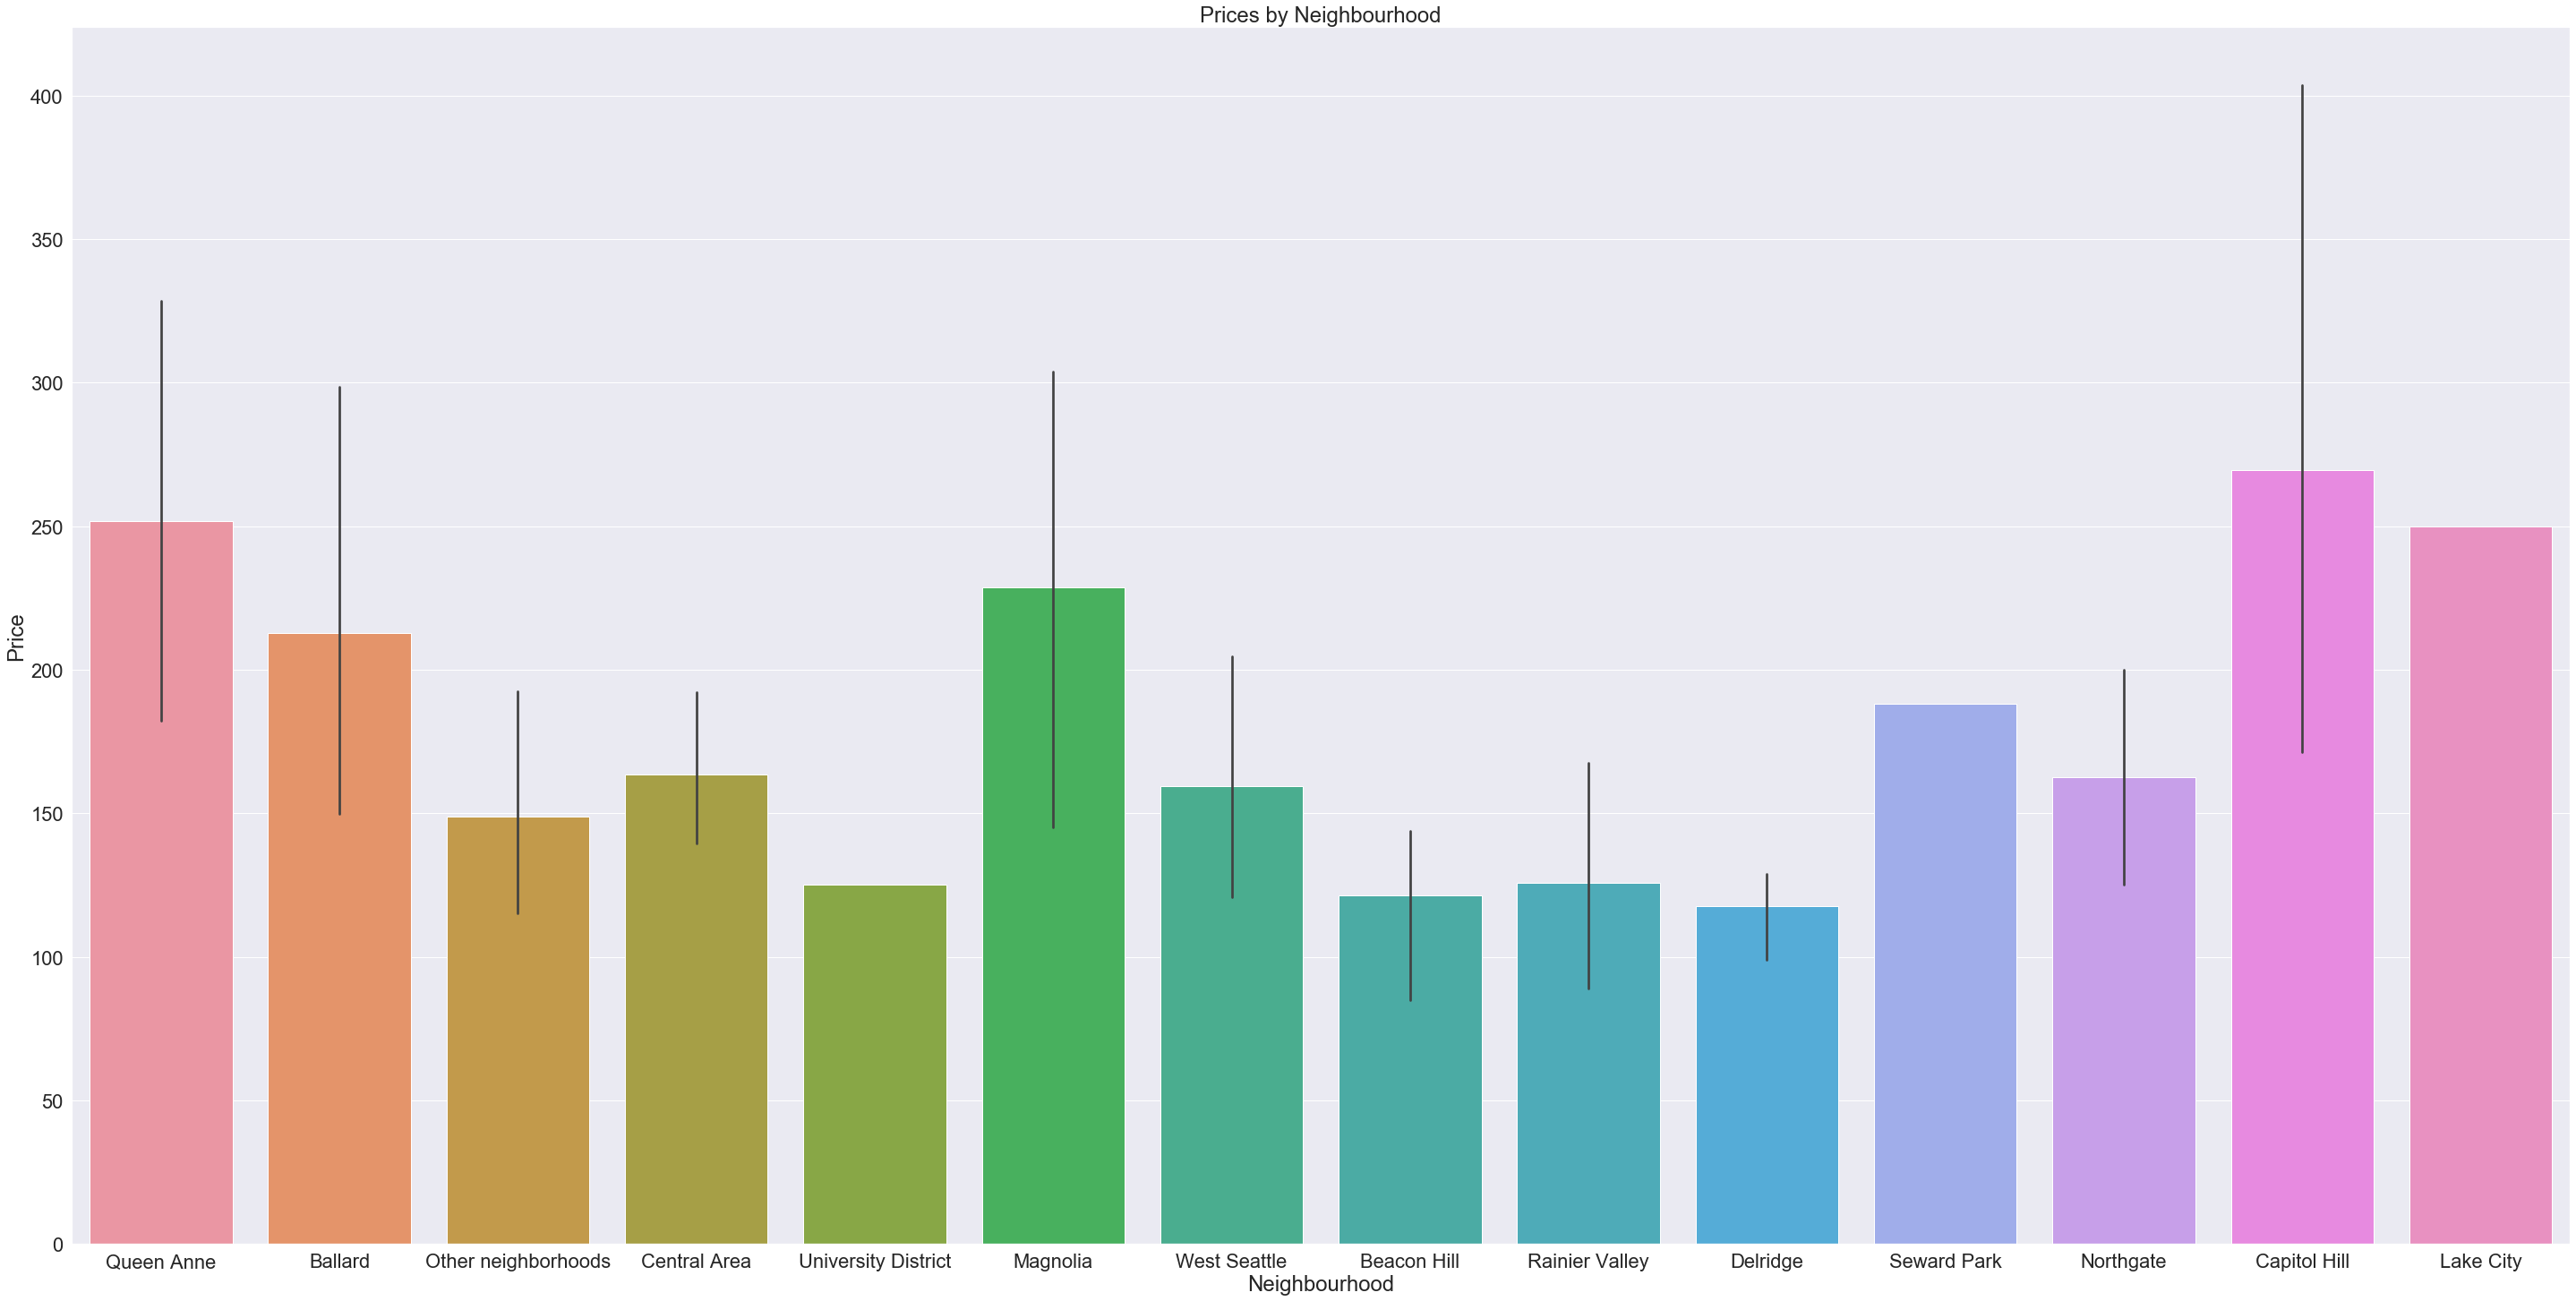

In [26]:
tic = time.time()
plt.figure(figsize=(50,25))
sns.set(font_scale=2)
sns.barplot(df3_c['neighbourhood_group_cleansed'], df3_c['price'])
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Prices by Neighbourhood') 
plt.savefig('house_price.jpg')
toc = time.time() - tic
print("Time taken to generate this graph: %s seconds."%(toc)) #Capitol Hill prices top for this subset

Time taken to generate this graph: 0.8654179573059082 seconds.


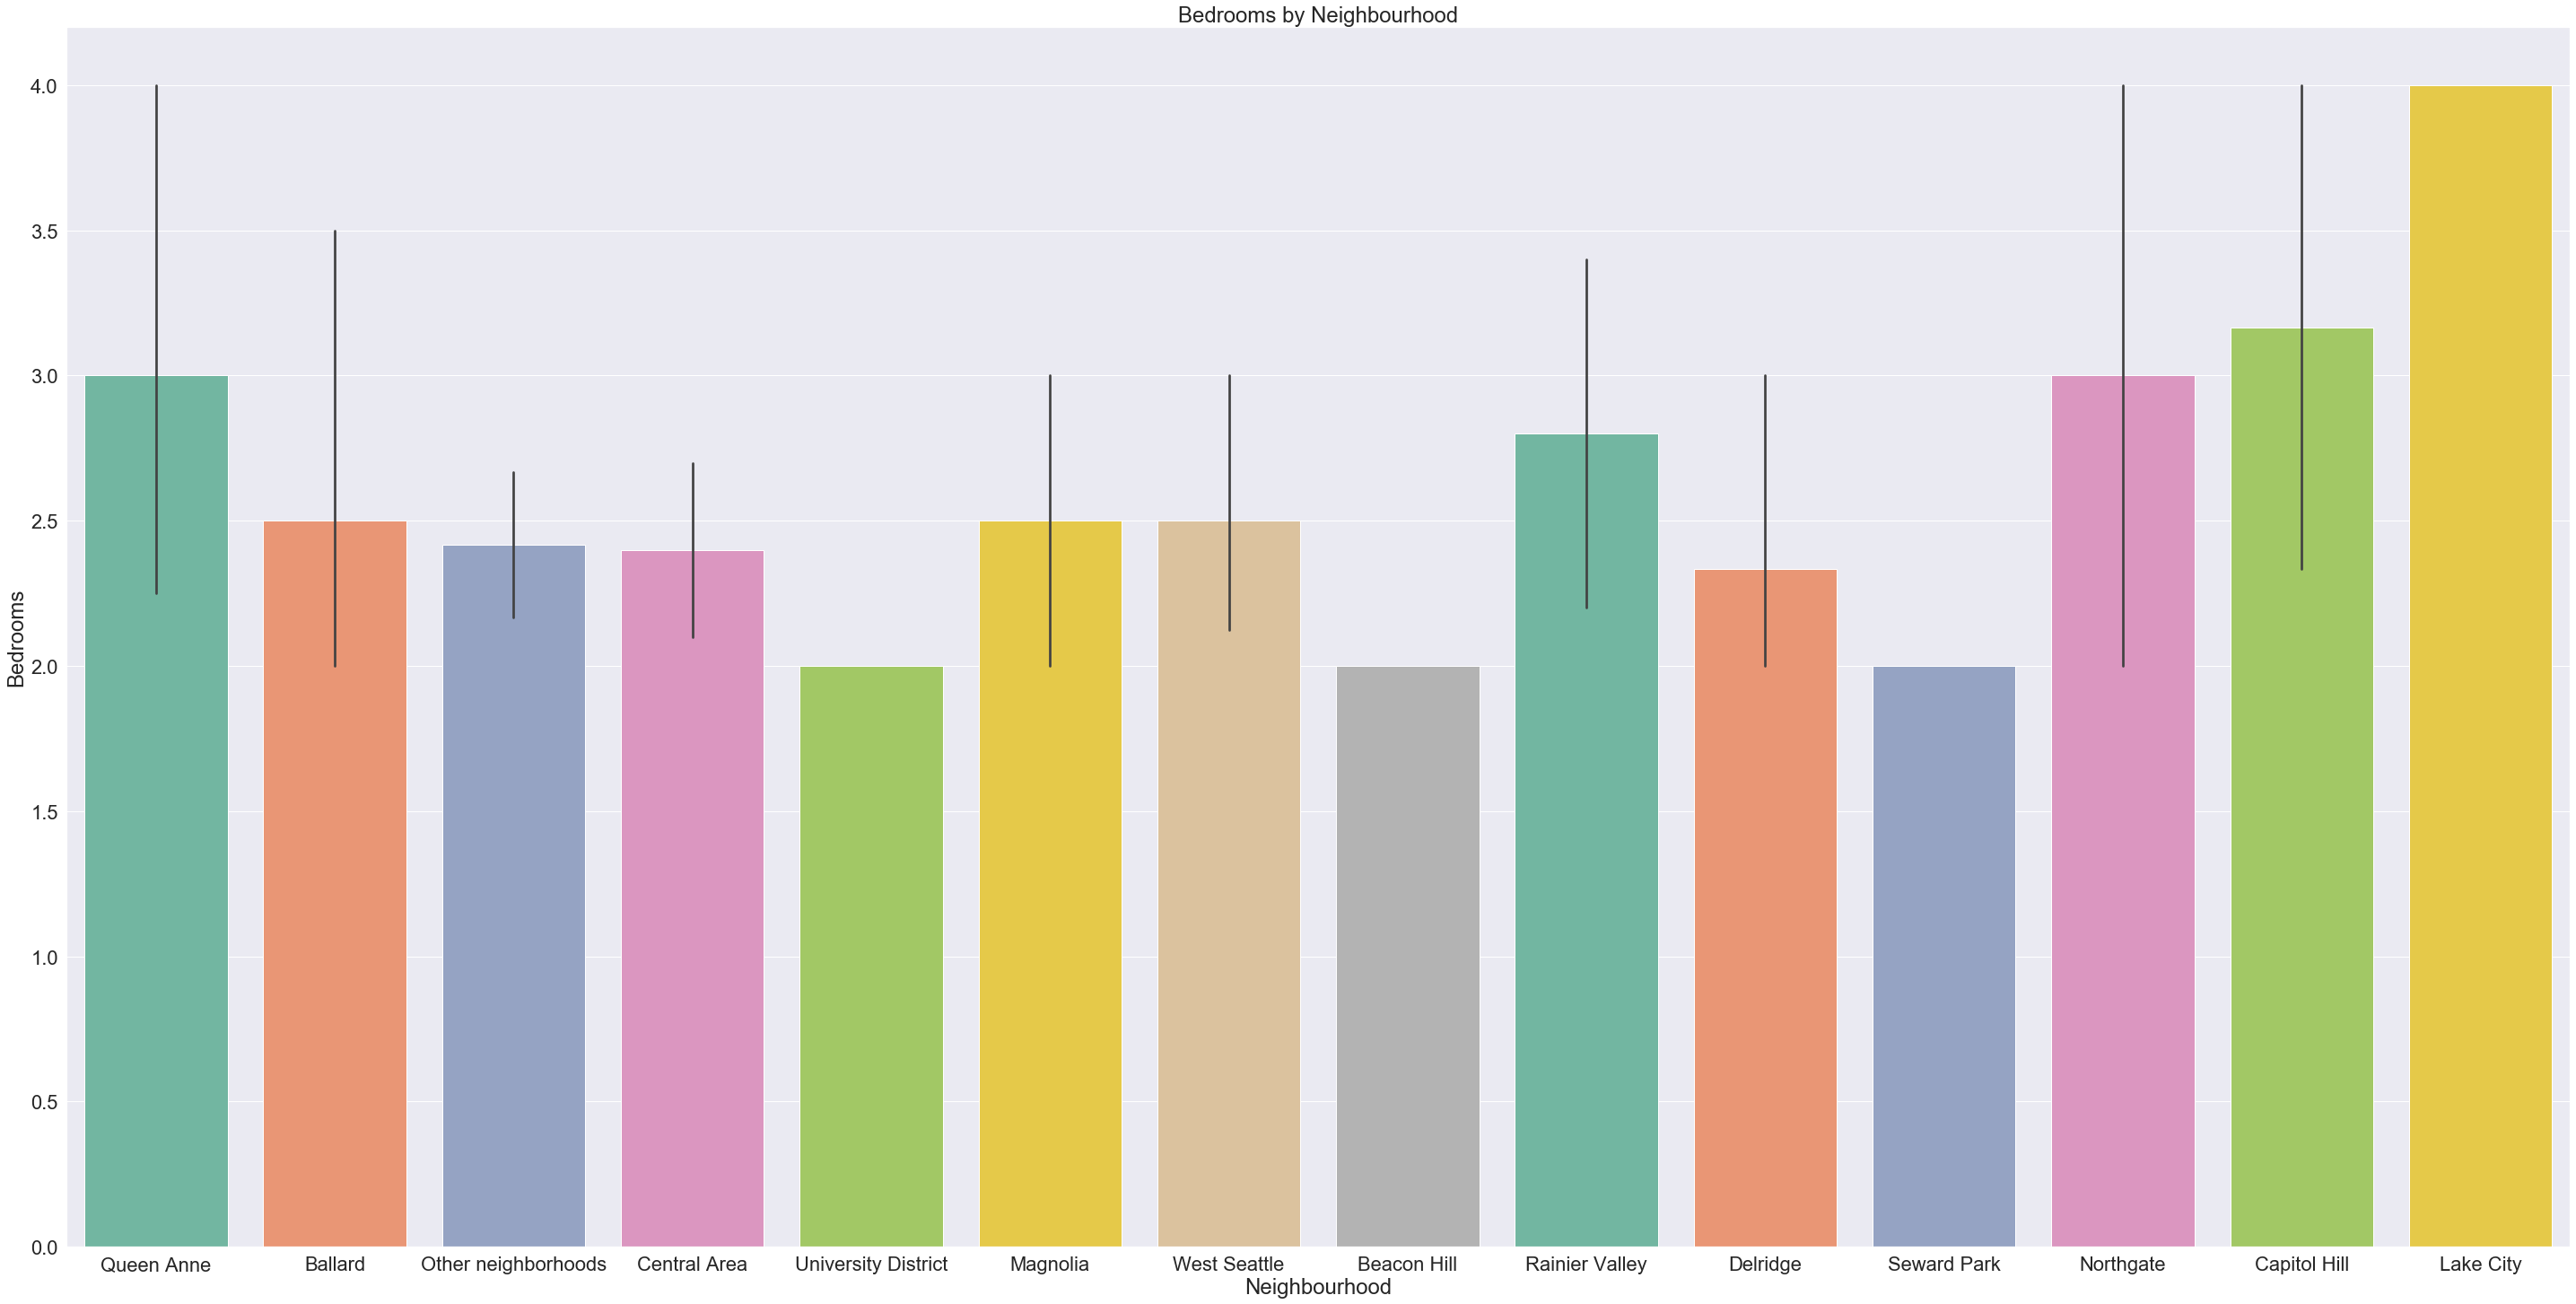

In [27]:
tic = time.time()
plt.figure(figsize=(50,25))
sns.set(font_scale=2)
sns.barplot(df3_c['neighbourhood_group_cleansed'], df3_c['bedrooms'],palette='Set2')
plt.xlabel('Neighbourhood')
plt.ylabel('Bedrooms')
plt.title('Bedrooms by Neighbourhood')
plt.savefig('house_bed.jpg')
toc = time.time() - tic
print("Time taken to generate this graph: %s seconds."%(toc)) #Lake City has most bedrooms available

Time taken to generate the histogram: 0.3728160858154297 seconds.


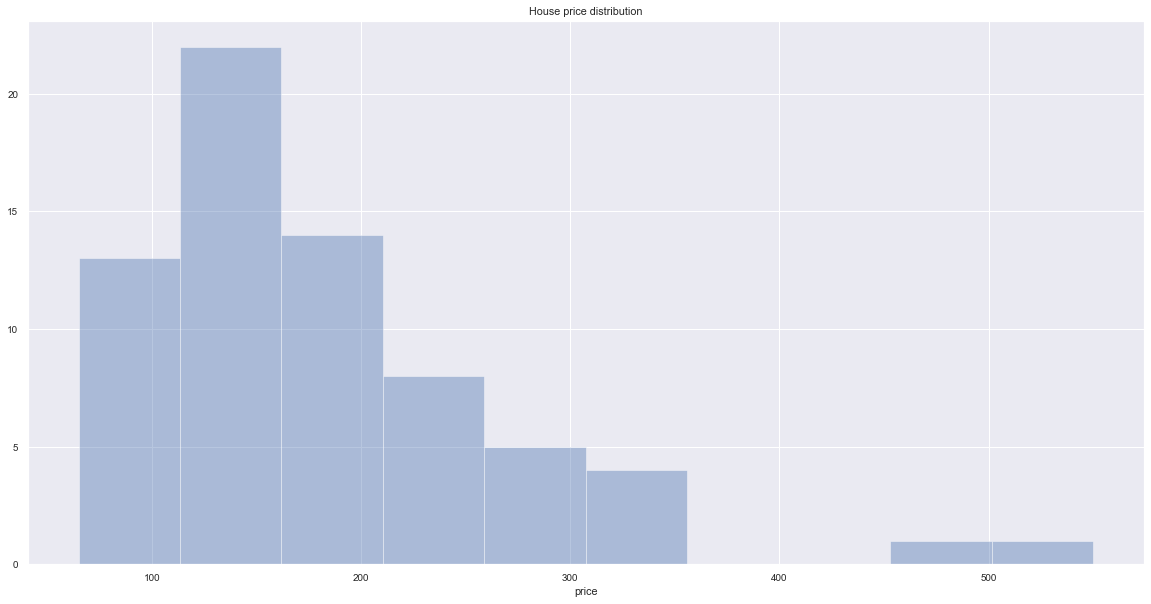

In [29]:
tic = time.time()
plt.figure(figsize=(20,10))
sns.set(font_scale=0.9)
sns.distplot(df3_c['price'],kde=False)
plt.title("House price distribution")
plt.savefig('house_price_hist.jpg')
toc = time.time() - tic
print("Time taken to generate the histogram: %s seconds."%(toc)) #overall price distribution is centred around USD 150 for houses

In [30]:
h_med = df3_c['price'].median()
print("Median house price with these specs is USD {}.".format(int(h_med)))

Median house price with these specs is USD 160.


In [36]:
#looking at listings by neighbourhood

df4 = df3_c.groupby(['neighbourhood_group_cleansed','price']).sum().reset_index() #lets take a closer look at neighbourhoods now
df4

,neighbourhood_group_cleansed,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month,review_scores_rating,review_scores_checkin,review_scores_location,review_scores_communication
0,Ballard,133.0,2.0,30,60,90,365,2,8,2.87,95.0,9.0,10.0,10.0
1,Ballard,180.0,2.0,9,14,14,60,3,6,3.40,96.0,10.0,10.0,10.0
2,Ballard,200.0,2.0,20,20,32,284,3,5,2.87,93.0,10.0,9.0,10.0
3,Ballard,338.0,4.0,16,46,72,154,3,8,2.05,97.0,10.0,10.0,10.0
4,Beacon Hill,85.0,2.0,26,47,77,96,2,4,2.92,98.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,West Seattle,129.0,4.0,43,103,154,689,4,10,5.20,186.0,20.0,19.0,18.0
61,West Seattle,165.0,2.0,30,60,90,361,2,4,2.46,91.0,10.0,10.0,10.0
62,West Seattle,180.0,3.0,27,57,84,166,2,7,2.43,93.0,10.0,10.0,10.0
63,West Seattle,225.0,4.0,25,25,25,117,2,6,2.08,94.0,10.0,10.0,10.0


In [37]:
df4.shape

(65, 14)

In [38]:
df4['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    12
Central Area           10
Queen Anne              7
West Seattle            7
Capitol Hill            6
Magnolia                4
Ballard                 4
Rainier Valley          4
Beacon Hill             3
Delridge                3
Northgate               2
Seward Park             1
Lake City               1
University District     1
Name: neighbourhood_group_cleansed, dtype: int64

In [51]:
print("In this subset, {:.1f}% listings are in Other neighborhoods.".format(12/65*100))
print("In this subset, {:.1f}% listings are in Central Area.".format(10/65*100))

In this subset, 18.5% listings are in Other neighborhoods.
In this subset, 15.4% listings are in Central Area.


In [52]:
more_med = df4['price'].median()
print("The median house price with this subsetting is USD {}.".format(int(more_med)))

The median house price with this subsetting is USD 160.


Time taken to generate this plot: 0.28626585006713867 seconds.


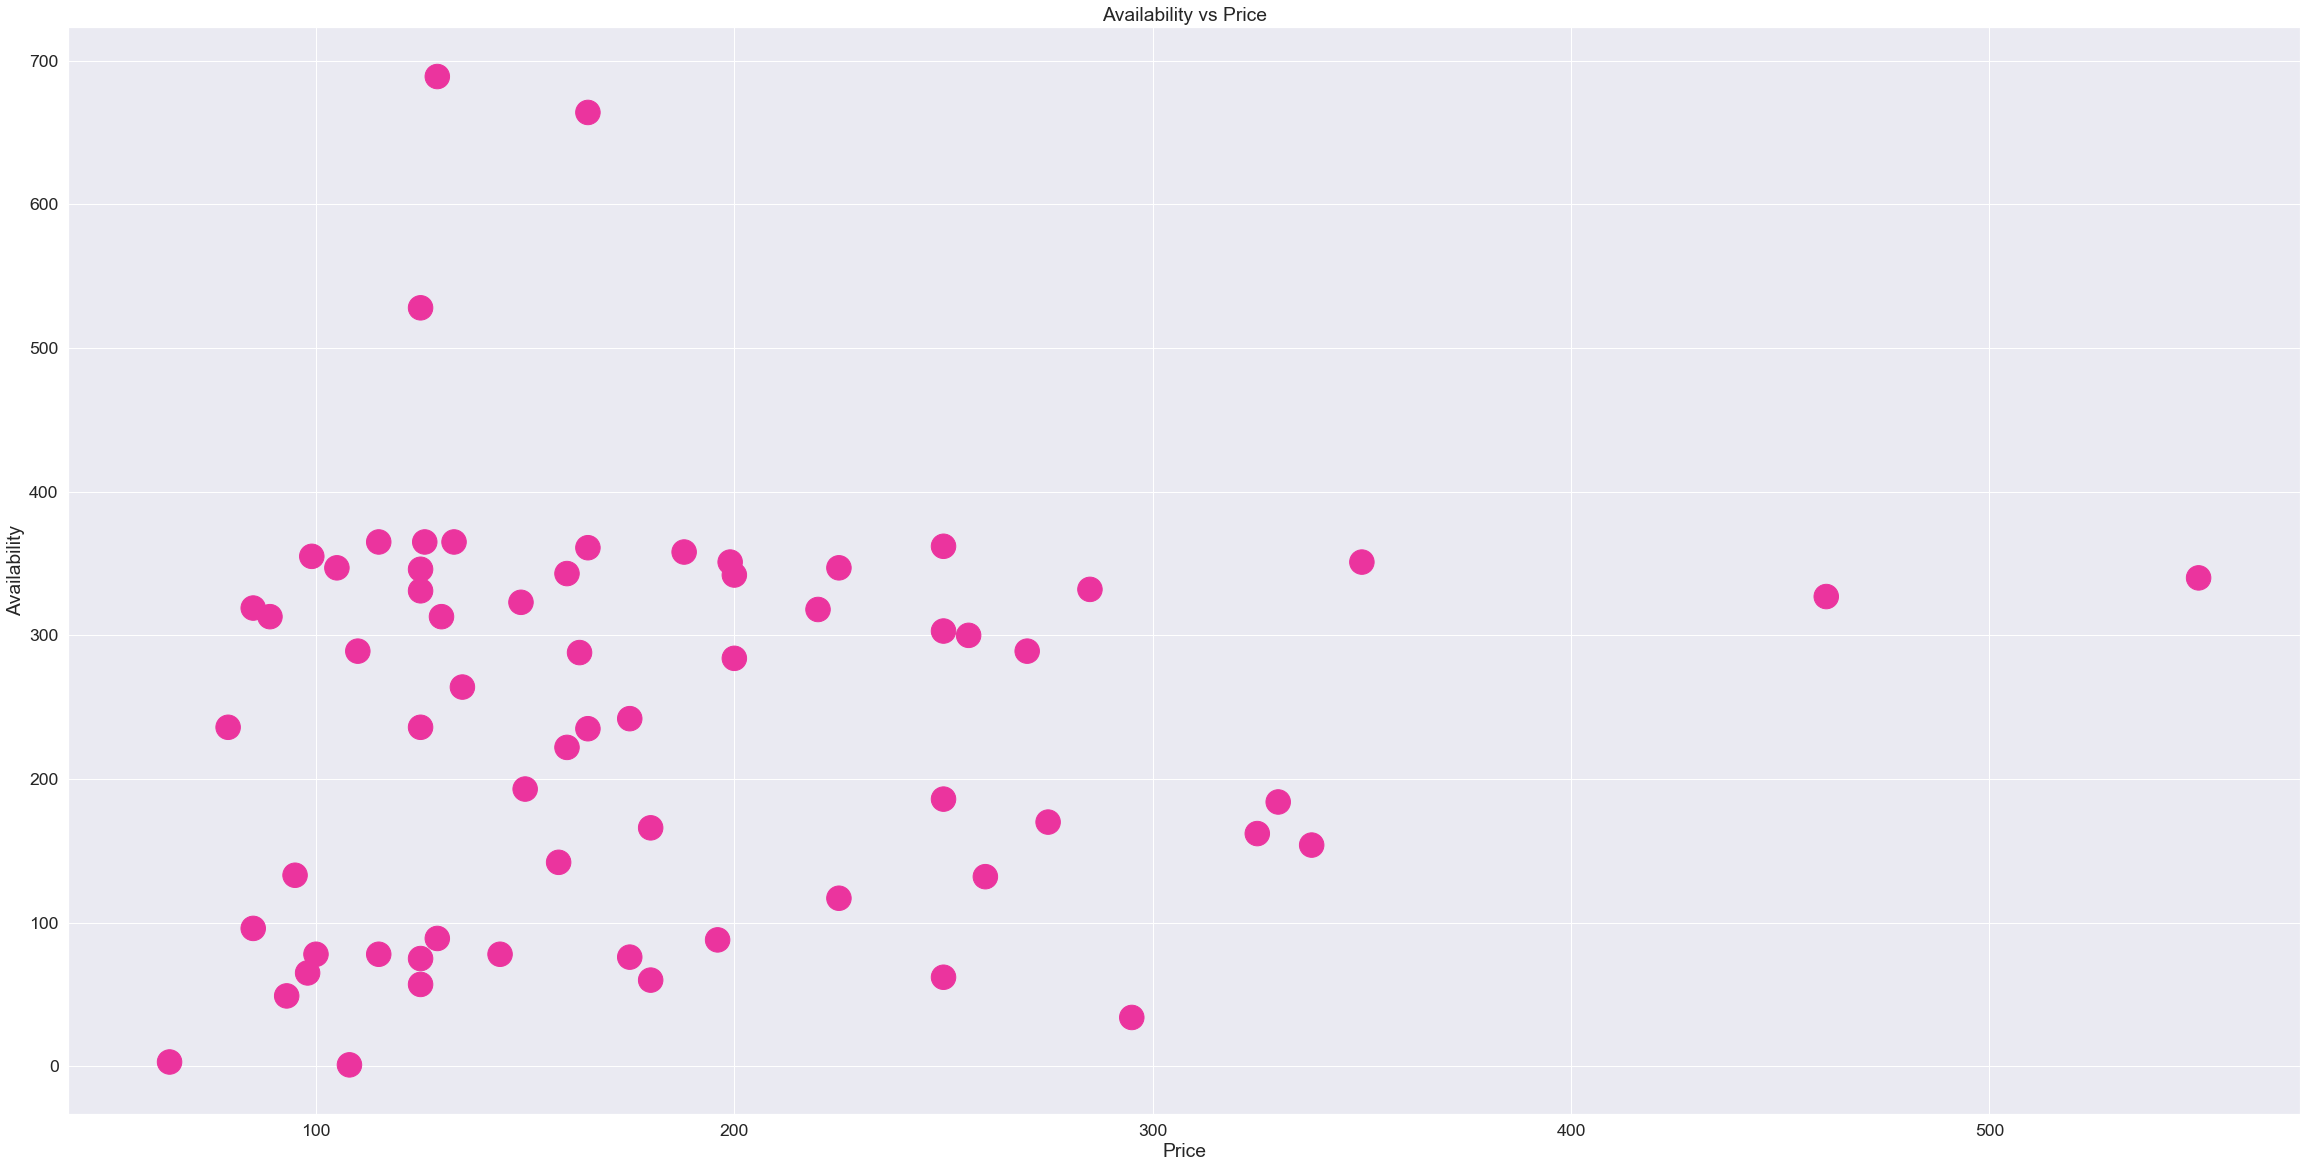

In [45]:
tic = time.time()
plt.figure(figsize=(40,20))
sns.set(font_scale=1.6)
plt.scatter(df4['price'],df4['availability_365'], 
            sizes=(600,600),color='#eb349e')
plt.xlabel('Price')
plt.ylabel('Availability')
plt.title("Availability vs Price")
plt.savefig('house_avail.jpg')
toc = time.time() - tic
print("Time taken to generate this plot: %s seconds."%(toc))
#good availability in within the USD 250 range, for Houses

Time taken to generate this graph: 0.41935300827026367 seconds.


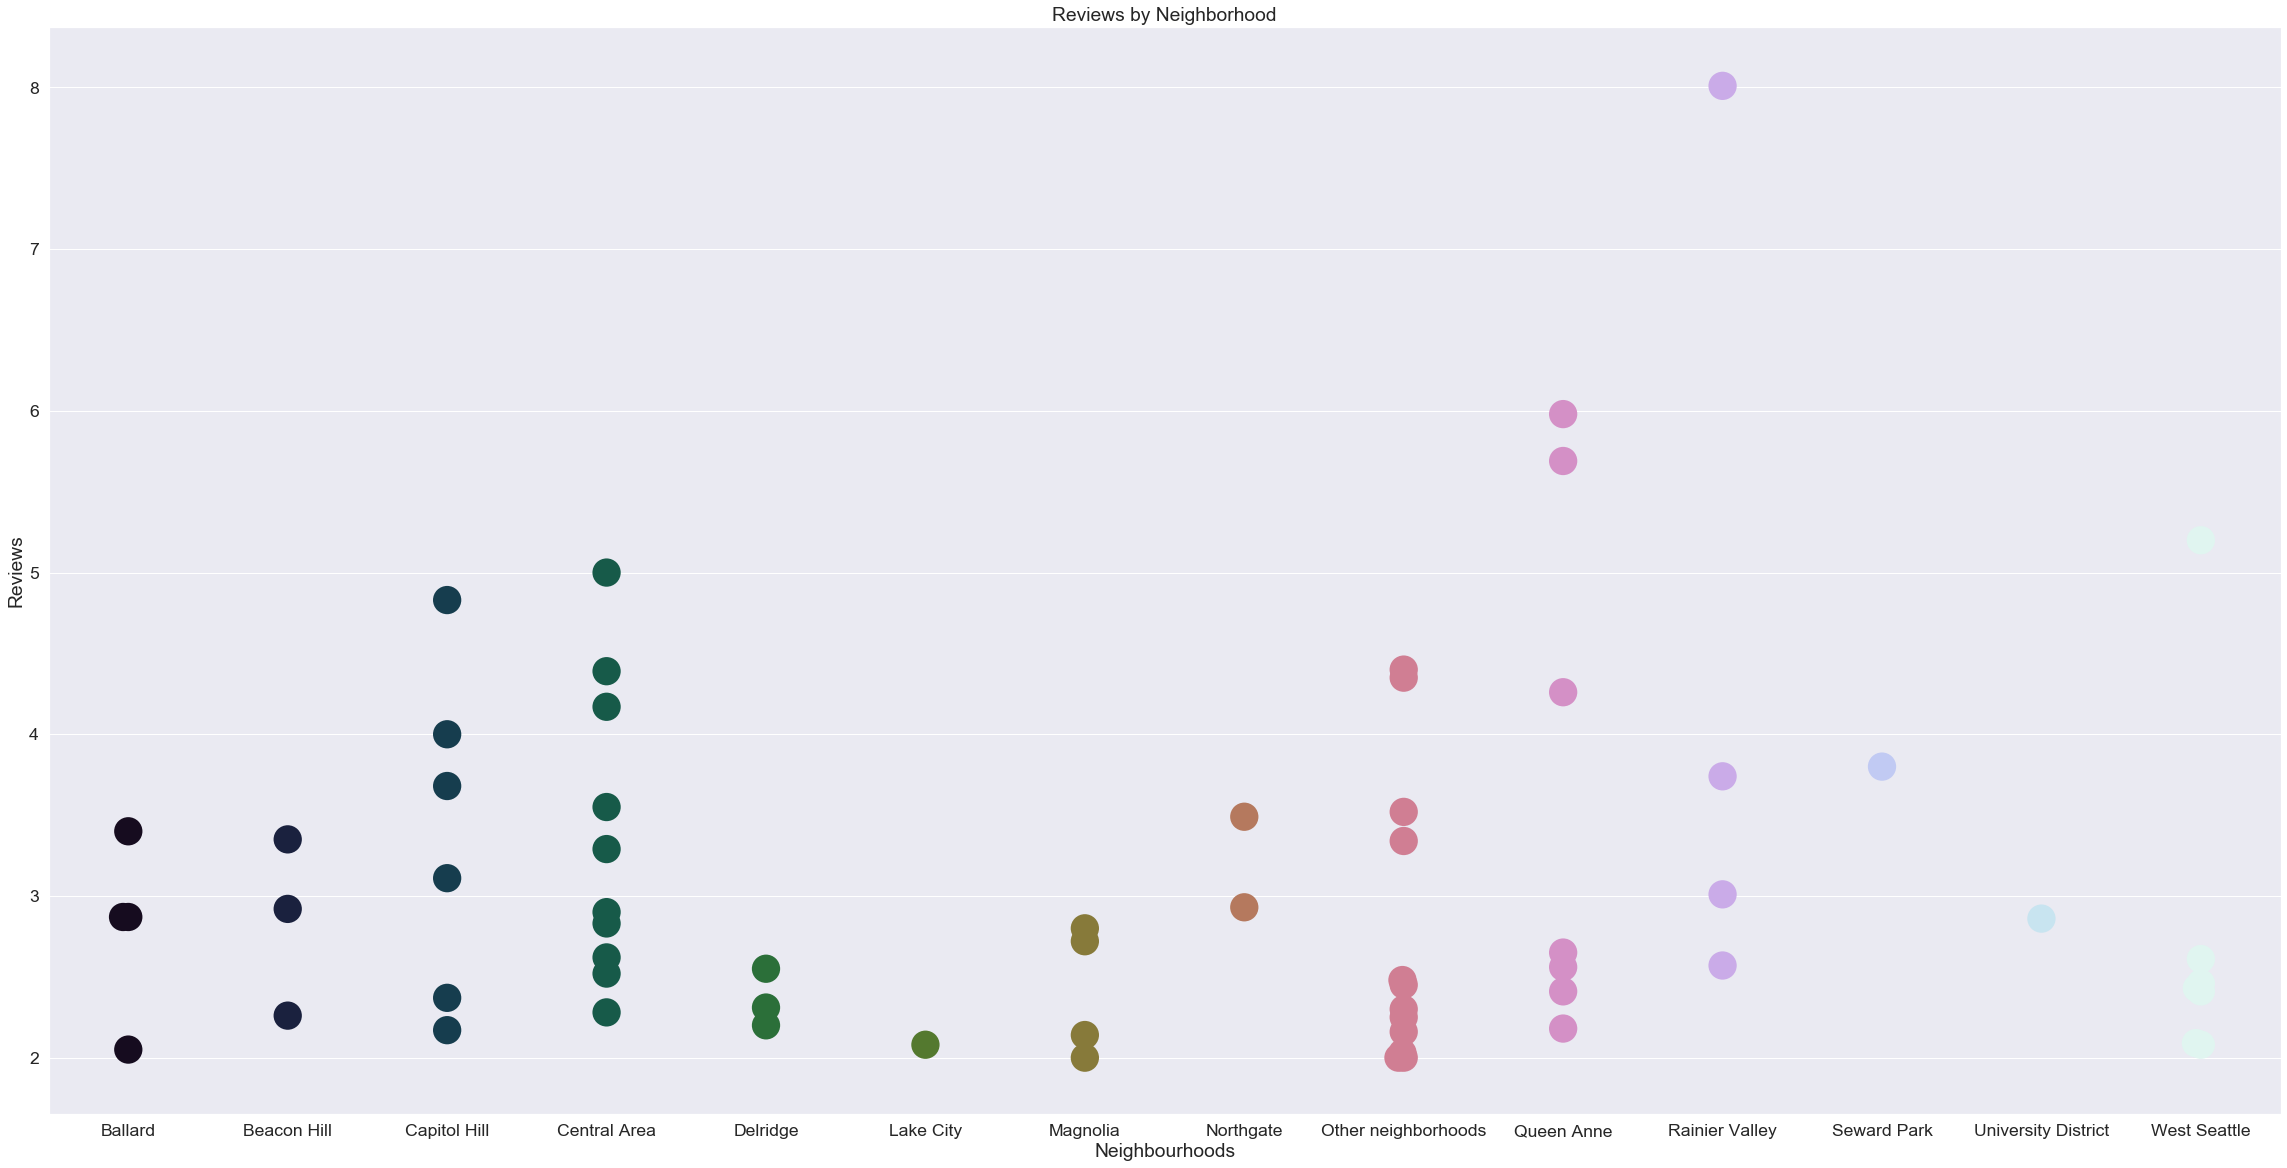

In [49]:
tic = time.time()
plt.figure(figsize=(40,20))
sns.set(font_scale=1.6)
sns.swarmplot(df4['neighbourhood_group_cleansed'],df4['reviews_per_month'],
              sizes=(800,800),palette='cubehelix')
plt.xlabel('Neighbourhoods')
plt.ylabel('Reviews')
plt.title('Reviews by Neighborhood')
plt.savefig('house_hood_reviews.jpg')
toc = time.time() - tic
print("Time taken to generate this graph: %s seconds."%(toc)) #Queen Anne gets more reviews

In [50]:
df4.columns

Index(['neighbourhood_group_cleansed', 'price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month',
       'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'review_scores_communication'],
      dtype='object')

In [60]:
df5 = df3_c[['price', 'bedrooms', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'minimum_nights', 'accommodates', 'reviews_per_month']]
df5.head()

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month
13,165.0,2.0,13,40,63,337,2,5,3.00
14,461.0,6.0,19,40,65,327,3,16,2.65
31,325.0,3.0,23,50,77,162,2,6,2.18
125,338.0,4.0,16,46,72,154,3,8,2.05
151,133.0,2.0,30,60,90,365,2,8,2.87


In [61]:
df5.describe() #summary stats at this stage

,price,bedrooms,availability_30,availability_60,availability_90,availability_365,minimum_nights,accommodates,reviews_per_month
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,181.308824,2.602941,16.838235,39.529412,62.750000,230.455882,2.264706,5.941176,2.954853
std,90.283014,0.831106,10.642930,17.964701,25.759725,116.763498,0.821677,2.006574,0.870551
min,65.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000
25%,125.000000,2.000000,8.000000,26.750000,48.000000,128.250000,2.000000,4.000000,2.295000
50%,160.000000,2.000000,19.500000,46.000000,72.500000,274.000000,2.000000,6.000000,2.705000
75%,225.000000,3.000000,26.000000,53.500000,81.500000,337.750000,2.000000,6.000000,3.362500
max,550.000000,6.000000,30.000000,60.000000,90.000000,365.000000,7.000000,16.000000,5.980000


Time taken to generate the pairwise plots: 7.38495397567749 seconds.


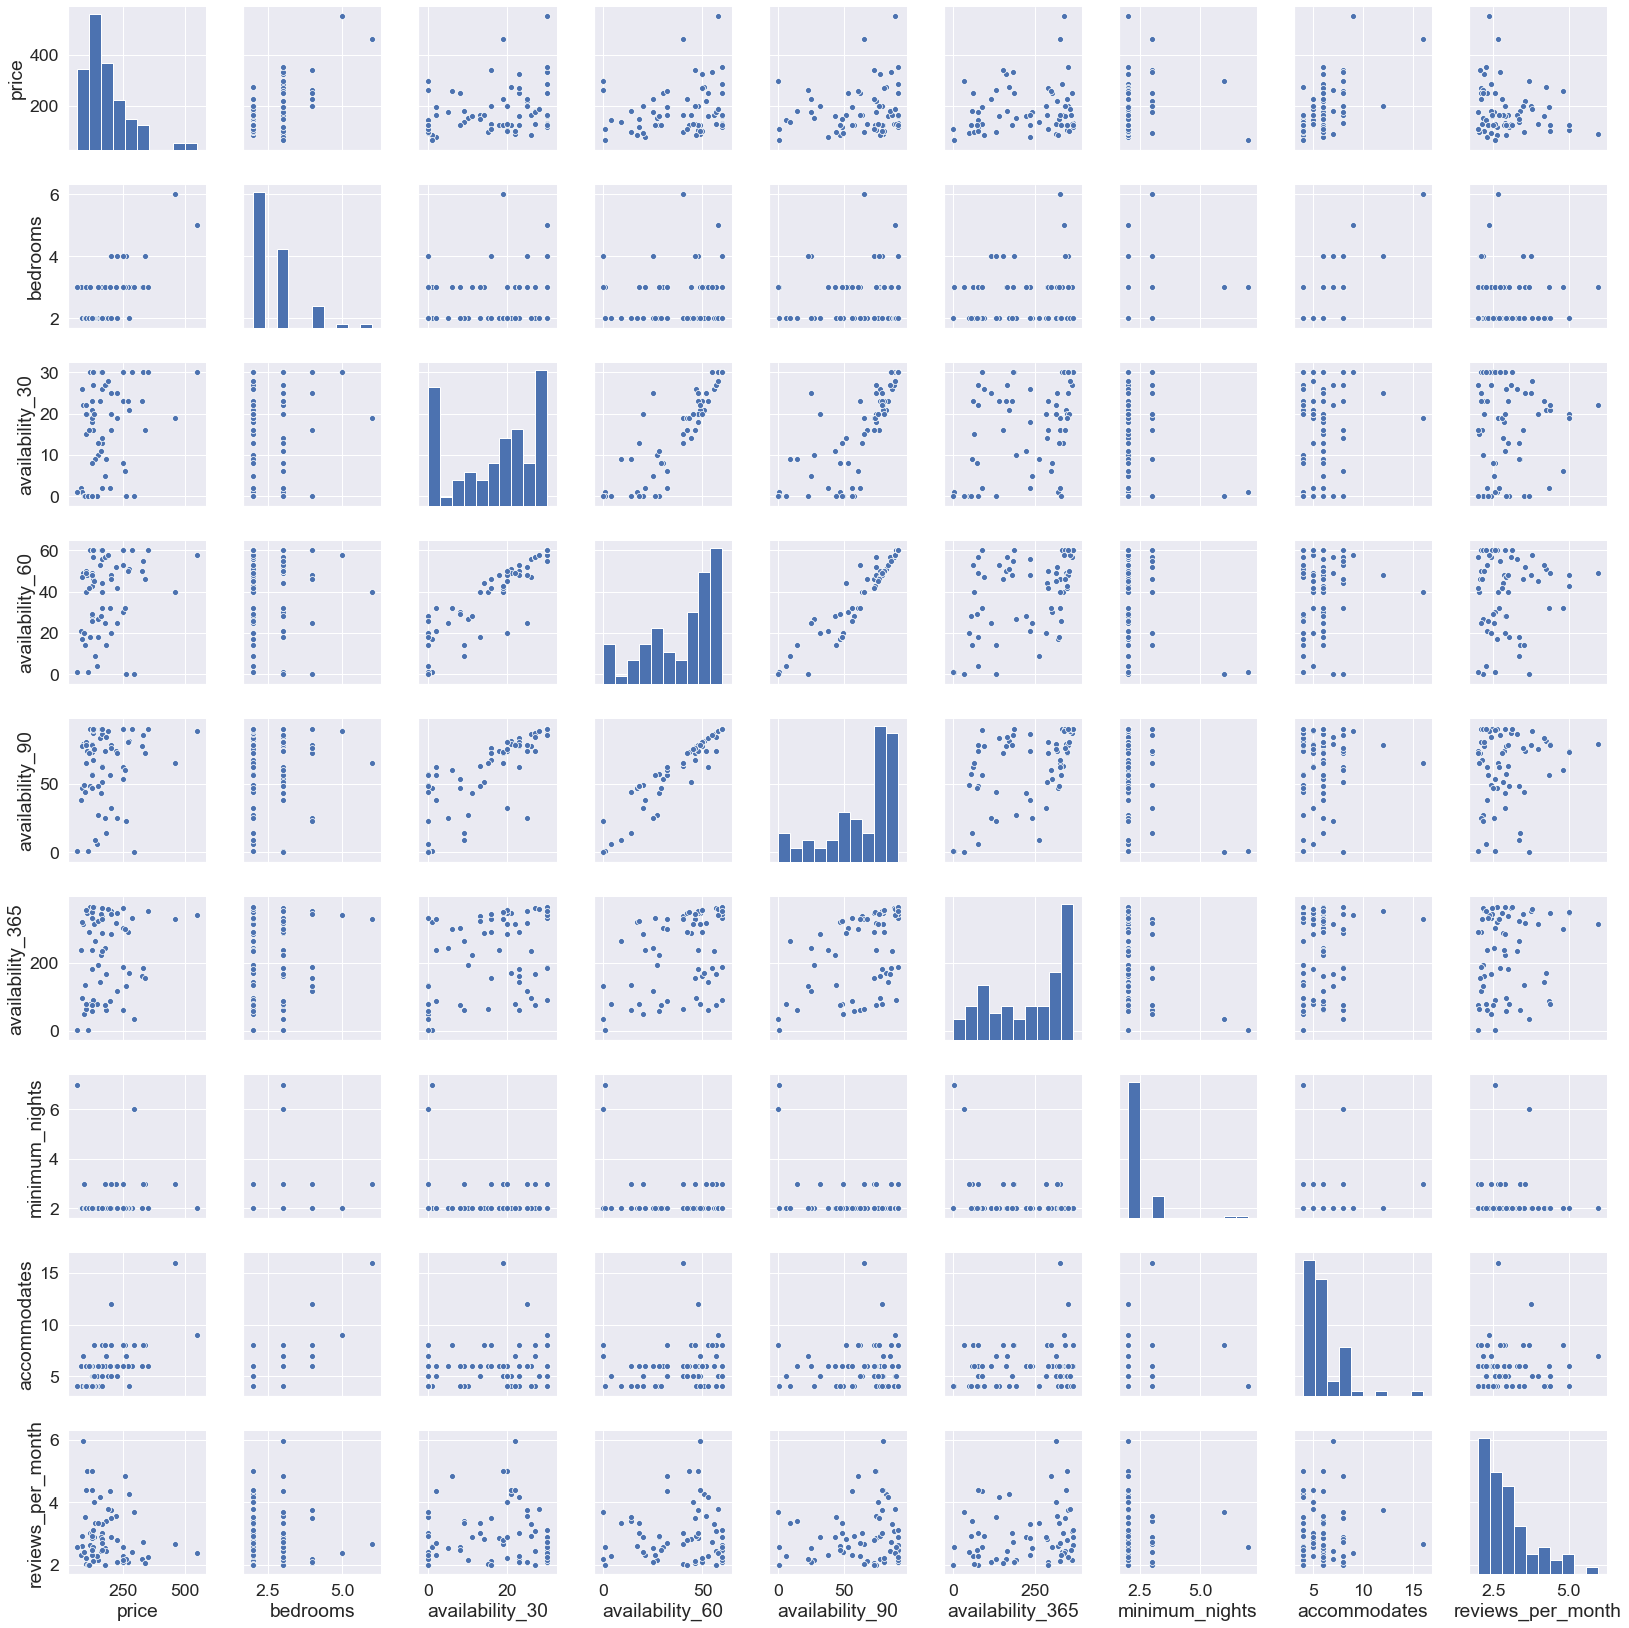

In [54]:
tic = time.time()
sns.pairplot(df5)
toc = time.time() - tic
print("Time taken to generate the pairwise plots: %s seconds."%(toc))

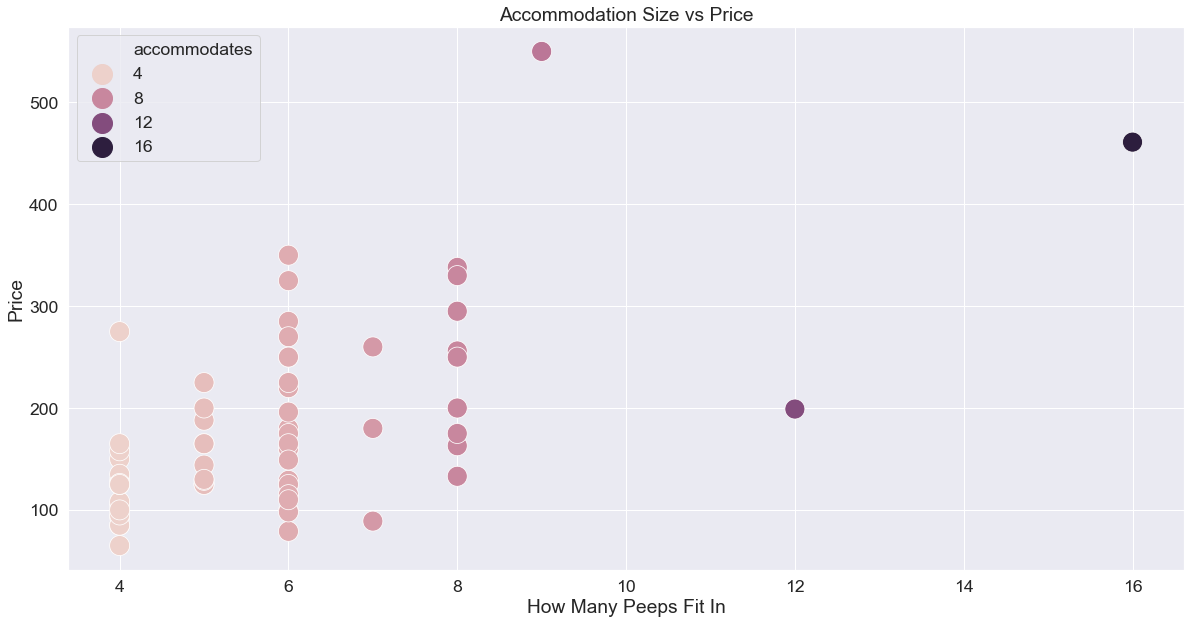

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(df5['accommodates'],df5['price'],
               hue=df5['accommodates'],size=df5['accommodates'],
               sizes=(400,400))
plt.xlabel('How Many Peeps Fit In')
plt.ylabel('Price')
plt.title('Accommodation Size vs Price')
plt.savefig('acco_price.jpg'); #the USD 100-350 listings seem to fit in 8 people, not bad

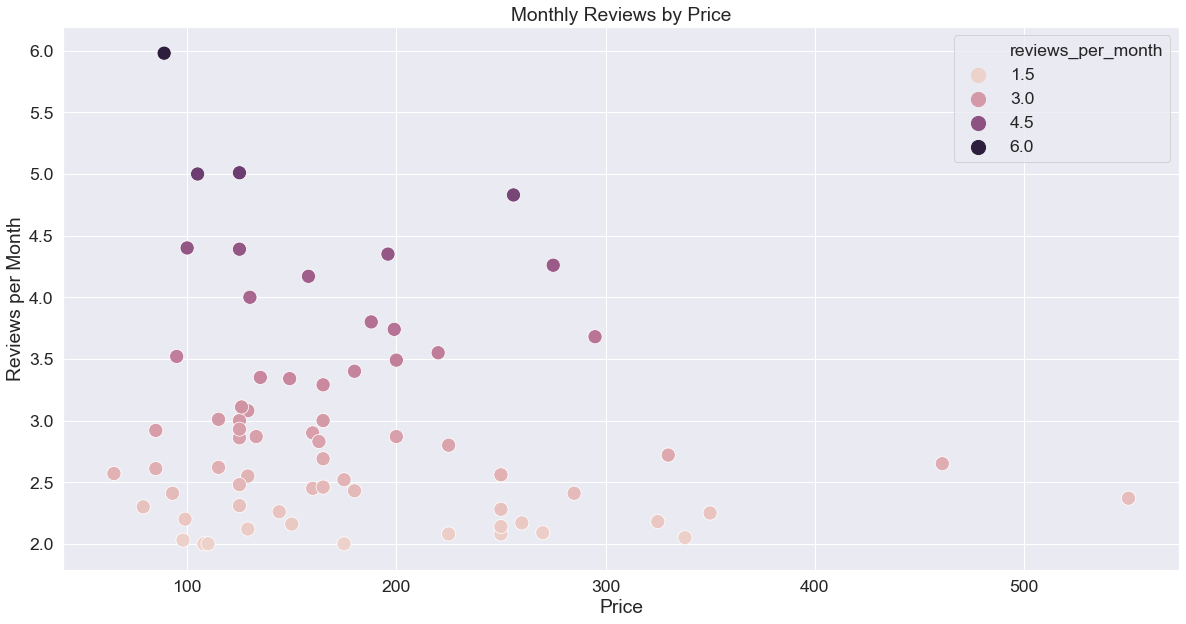

In [59]:
plt.figure(figsize=(20,10))
sns.scatterplot(df5['price'],df5['reviews_per_month'],
               hue=df5['reviews_per_month'],size=df5['reviews_per_month'],
               sizes=(200,200))
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.title('Monthly Reviews by Price')
plt.savefig('price_review.jpg'); #at least 4 reviews per month for the USD 200 listings

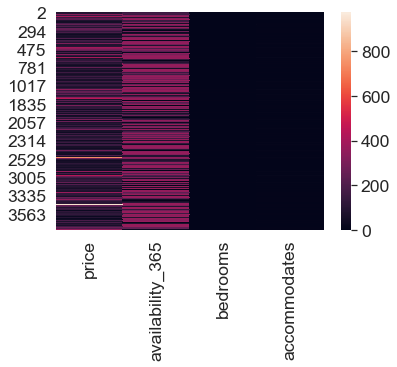

In [88]:
sns.heatmap(df5[['price','availability_365',
                 'bedrooms','accommodates']]);

# Conclusion


#### The house listings differ in respect of more availability, number of bedrooms and pricing in Lake City and Capitol Hill neighbourhoods, though Queen Anne and Central Area also seemed to score well in that regard. But I would point out again that Other Neighbourhoods also scored well in this regard and monthly reviews, lagging their apartment peers only slightly. So it would be recommended to give hosts in Other Neighbourhoods more visbility in terms of listings.